## Clusterization

## K-means

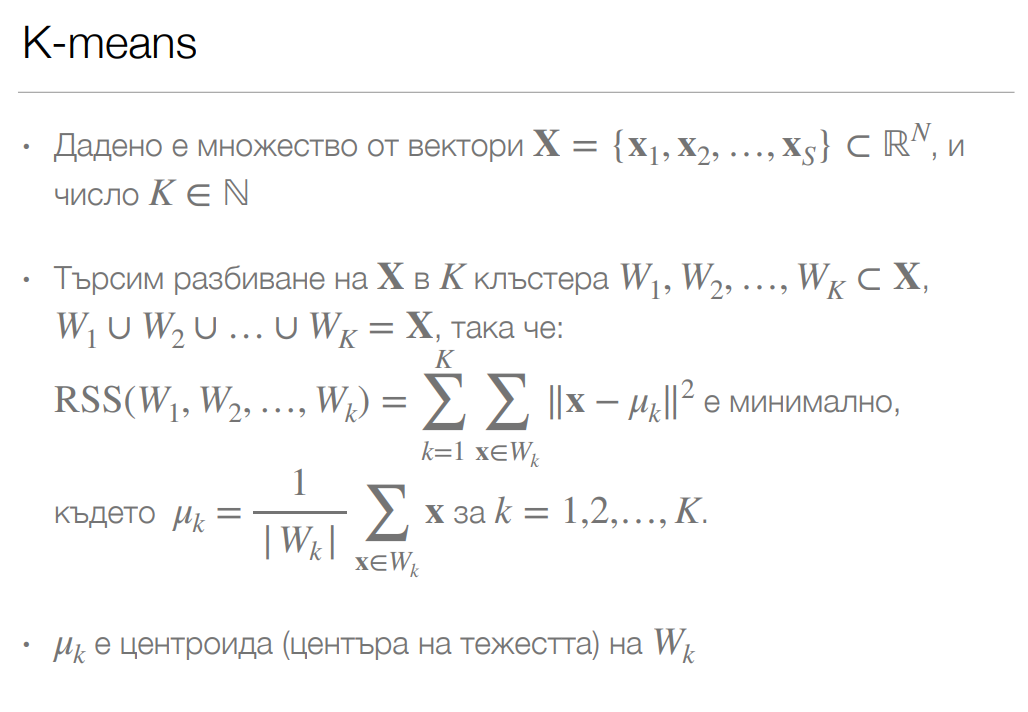

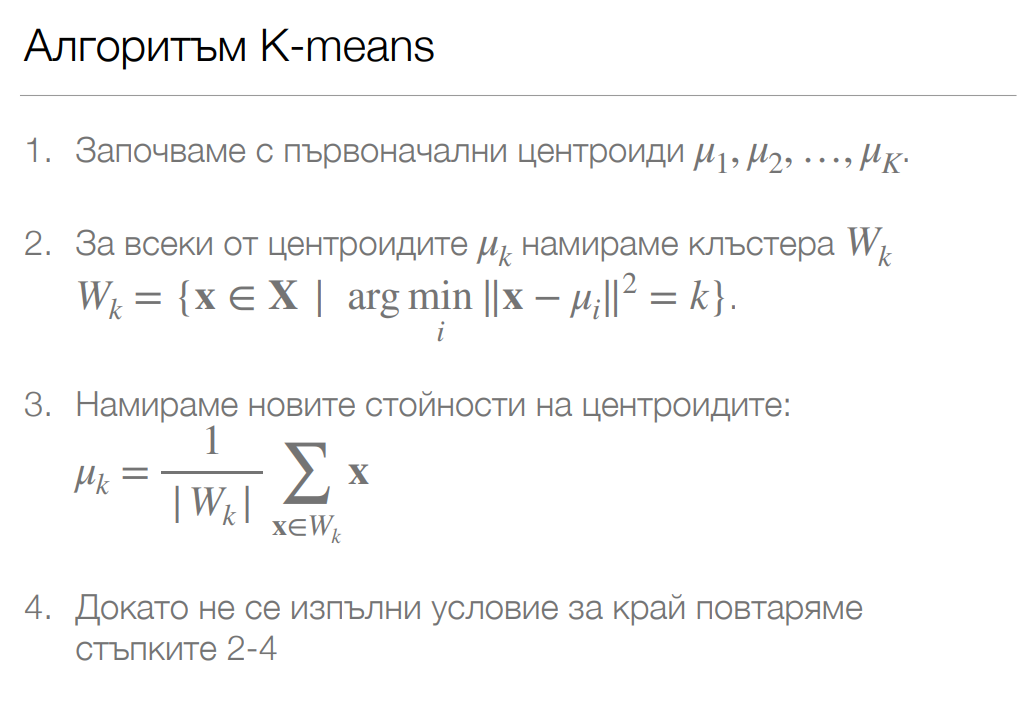

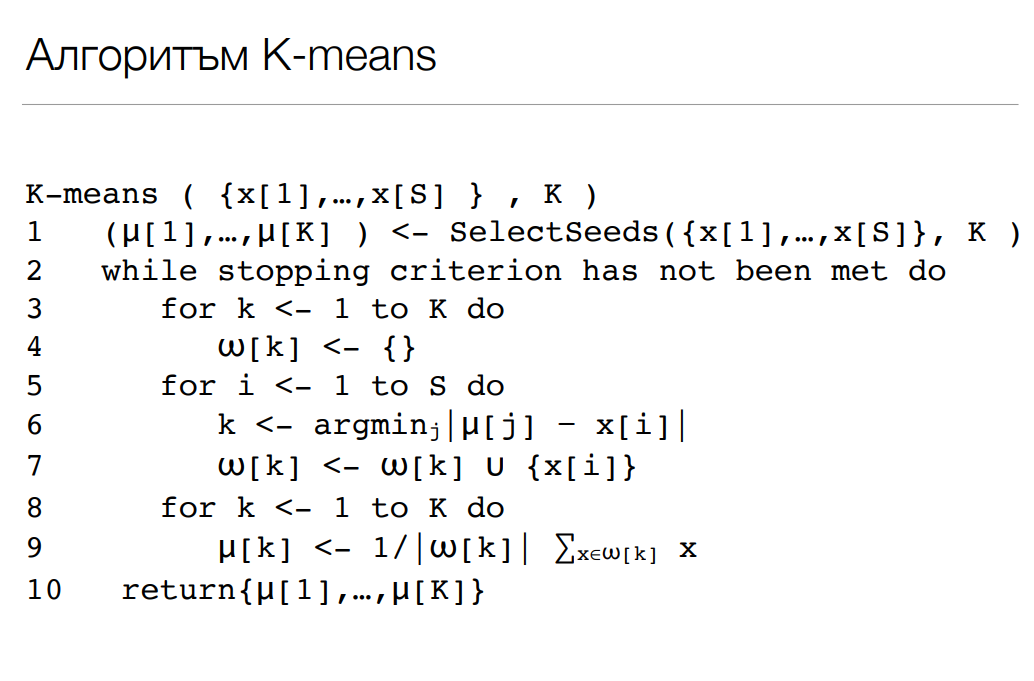

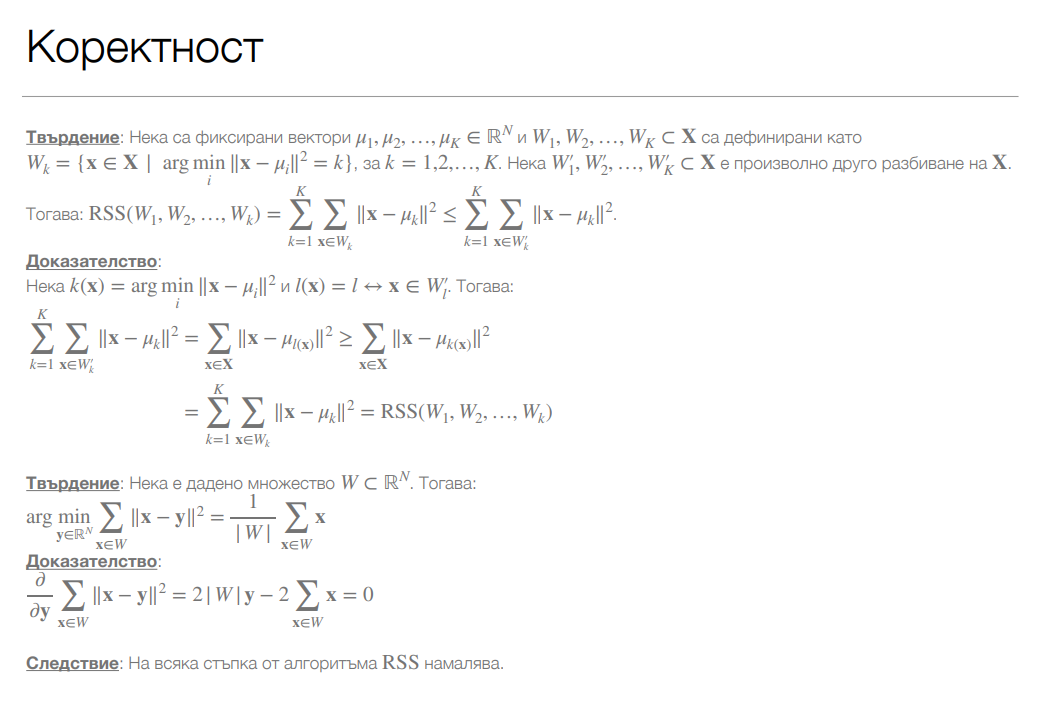

| Training  | Final centroids |
| ------------- | ------------- |
| 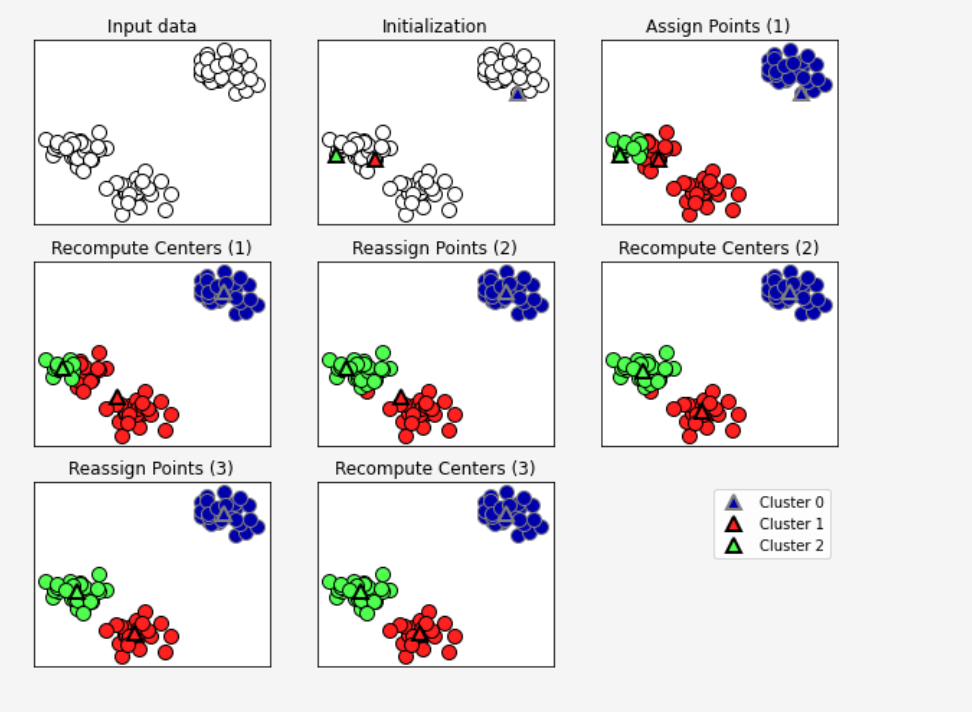   | 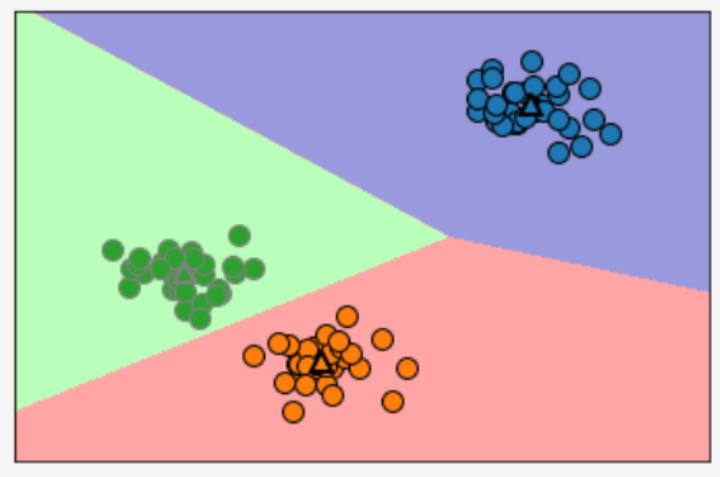  |



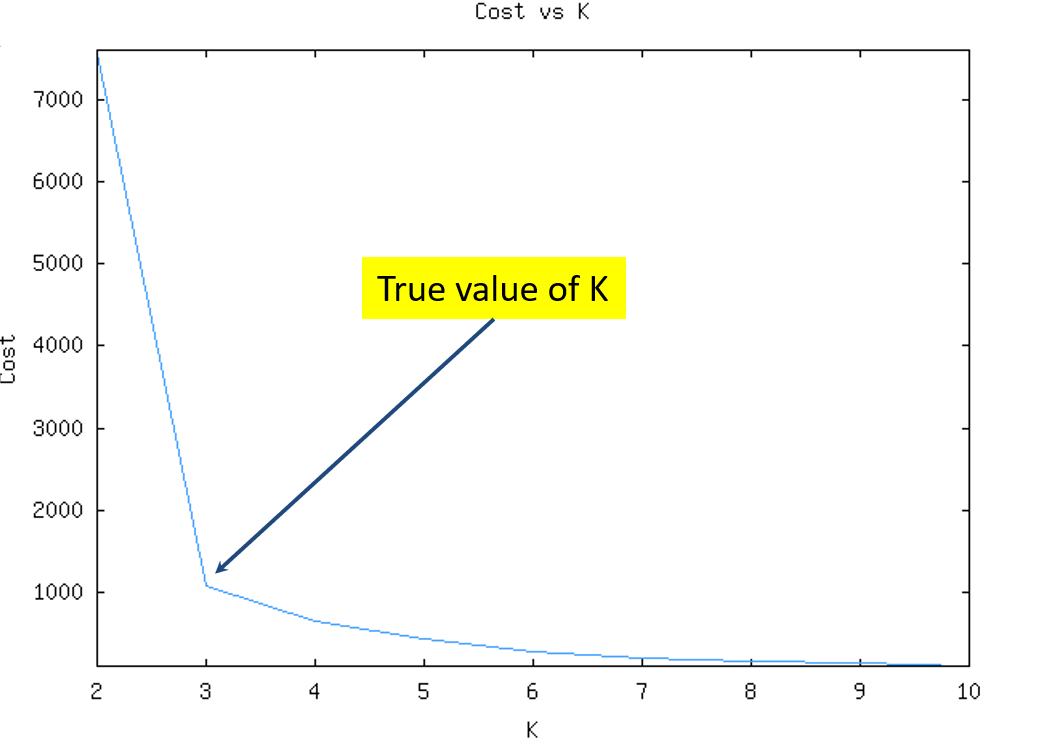

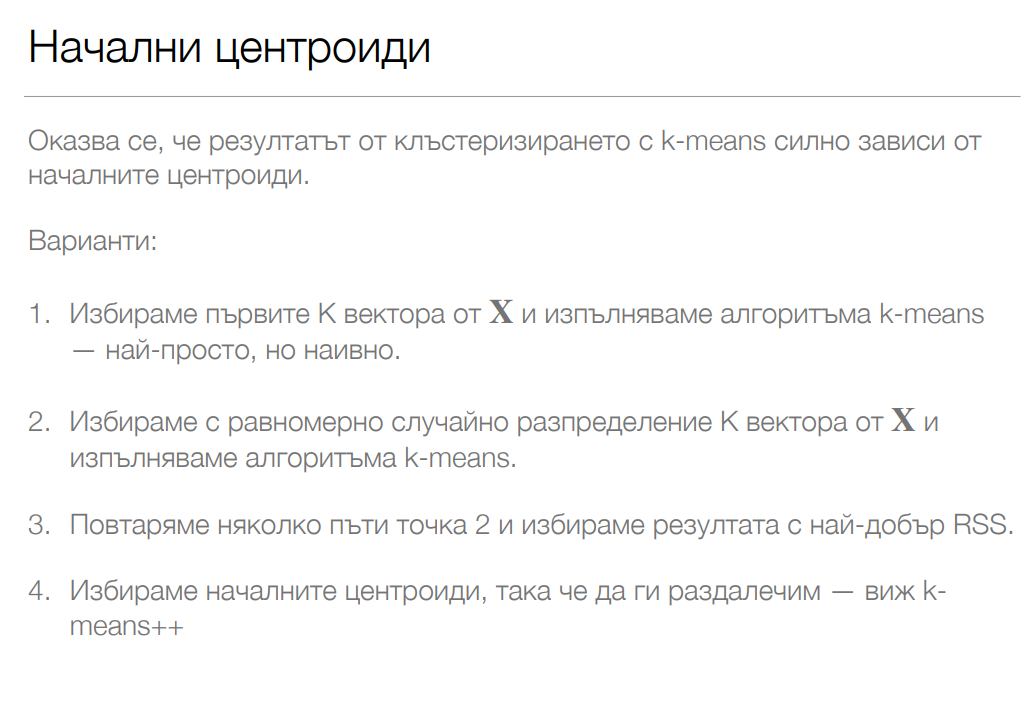

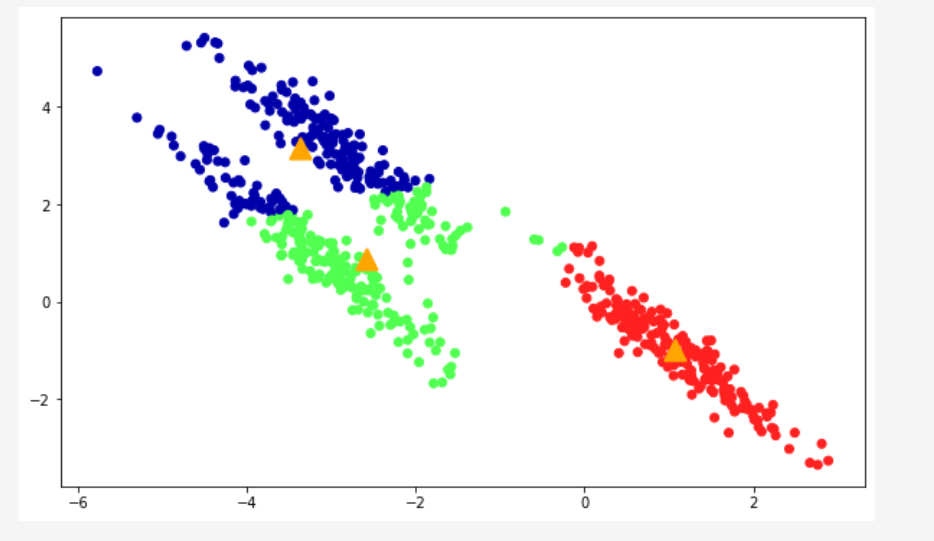

## K-means++

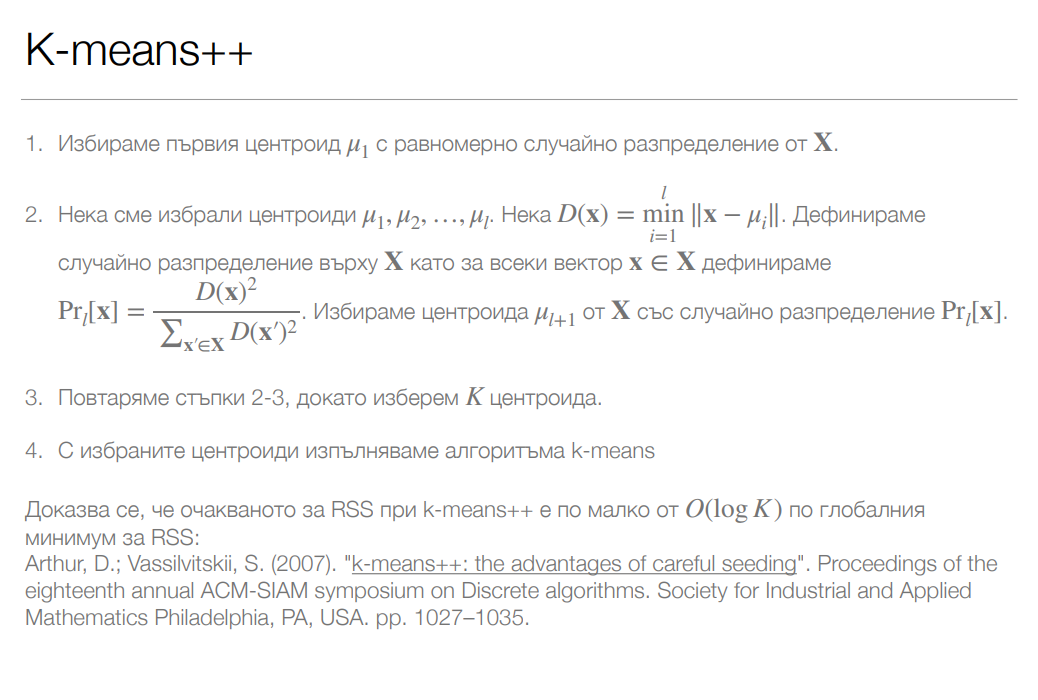

## Soft K-means

Soft assigns a point to clusters (so it give a probability of any point belonging to any centroid).
It doesn't depend on the L2 norm, but is based on the Expectation, i.e., the probability of the point belonging to a particular cluster. This makes K-means biased towards spherical clusters.

[Soft K-means](https://www.youtube.com/watch?v=fpM0iZTjLhM)

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('Data/fmi.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [250, 255, 255],
        [251, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       ...,

       [[ 71, 101,  11],
        [ 54,  83,   0],
        [ 91, 119,  32],
        ...,
        [ 22,  69,   0],
        [ 24,  71,   1],
        [ 28,  75,   5]],

       [[ 82, 115,  26],
        [ 91, 124,  35],
        [ 75, 105,  17],
        ...,
        [ 16,  63,   0],
        [ 20,  67,   0],
        [ 29,  76,   6]],

       [[ 94, 128,  41],
        [ 85, 119,  32],
        [ 95, 128,  41],
        ...,
        [ 23,  70,   0],
        [ 24,  71,   1],
        [ 29,  76,   6]]

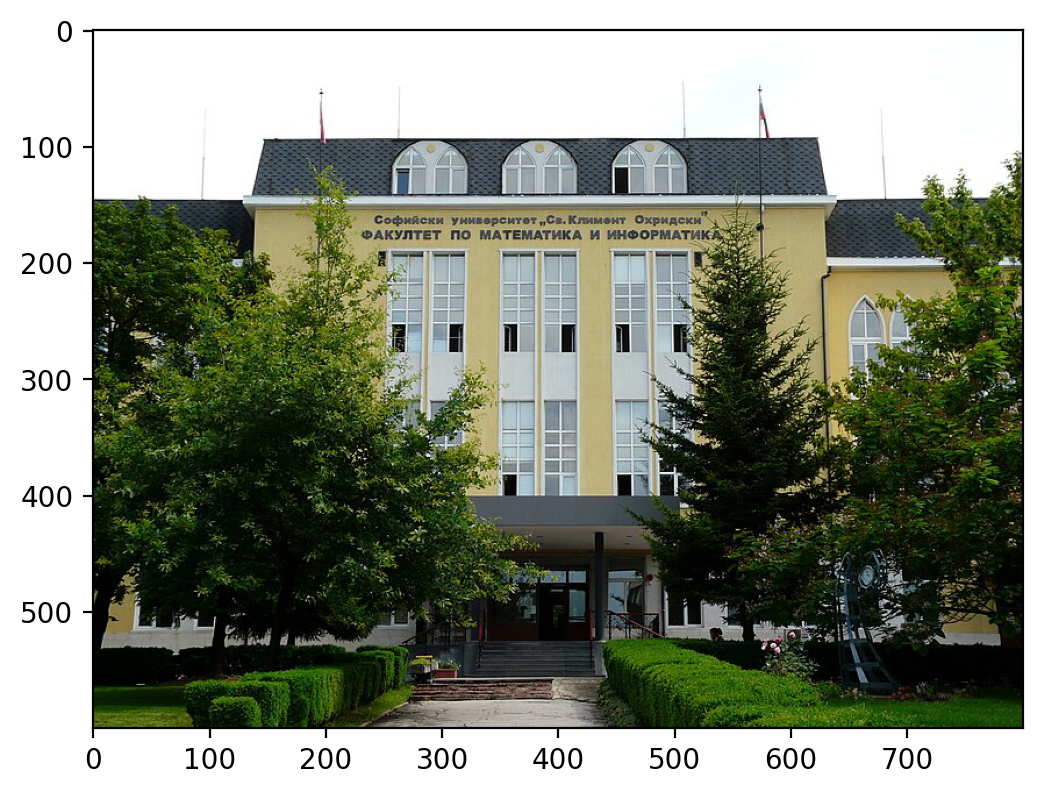

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(600, 800, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [30]:
# try x for x in [4, 32] clusters
model = KMeans(n_clusters=16)

In [31]:
model

KMeans(n_clusters=16)

In [32]:
labels = model.fit_predict(image_as_array2d)

c:\Users\MSI\anaconda3\envs\main\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
labels

array([ 3,  3,  3, ..., 12, 12, 13])

In [34]:
# THESE ARE THE x RGB COLOR CODES!
model.cluster_centers_

array([[ 15.75891991,  26.10940046,   8.57341876],
       [203.13087005, 211.3793058 , 212.40690246],
       [ 82.45127288,  89.74994118,  89.30304456],
       [253.94939965, 254.65993326, 254.62137322],
       [158.08238038, 152.53829371,  96.66784532],
       [149.89332549, 158.44004704, 159.3717142 ],
       [114.55727185, 122.31579733,  59.40802925],
       [ 81.00171867, 103.46807025,  25.09033783],
       [185.35325132, 175.86936145, 123.73875952],
       [ 61.89857856,  69.22930273,  61.32438532],
       [121.3443746 , 125.90698496, 119.14888057],
       [  3.34717037,   9.01323934,   1.87173315],
       [ 30.33304079,  49.99933301,   6.58509443],
       [ 53.04295168,  77.12494277,  11.93286719],
       [ 38.49340866,  45.42924401,  36.2999731 ],
       [178.06421506, 187.16866931, 186.10205108]])

In [35]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [36]:
rgb_codes

array([[ 16,  26,   9],
       [203, 211, 212],
       [ 82,  90,  89],
       [254, 255, 255],
       [158, 153,  97],
       [150, 158, 159],
       [115, 122,  59],
       [ 81, 103,  25],
       [185, 176, 124],
       [ 62,  69,  61],
       [121, 126, 119],
       [  3,   9,   2],
       [ 30,  50,   7],
       [ 53,  77,  12],
       [ 38,  45,  36],
       [178, 187, 186]])

In [37]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [38]:
quantized_image

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       ...,

       [[ 81, 103,  25],
        [ 53,  77,  12],
        [ 81, 103,  25],
        ...,
        [ 30,  50,   7],
        [ 30,  50,   7],
        [ 30,  50,   7]],

       [[ 81, 103,  25],
        [ 81, 103,  25],
        [ 81, 103,  25],
        ...,
        [ 30,  50,   7],
        [ 30,  50,   7],
        [ 53,  77,  12]],

       [[115, 122,  59],
        [ 81, 103,  25],
        [115, 122,  59],
        ...,
        [ 30,  50,   7],
        [ 30,  50,   7],
        [ 53,  77,  12]]

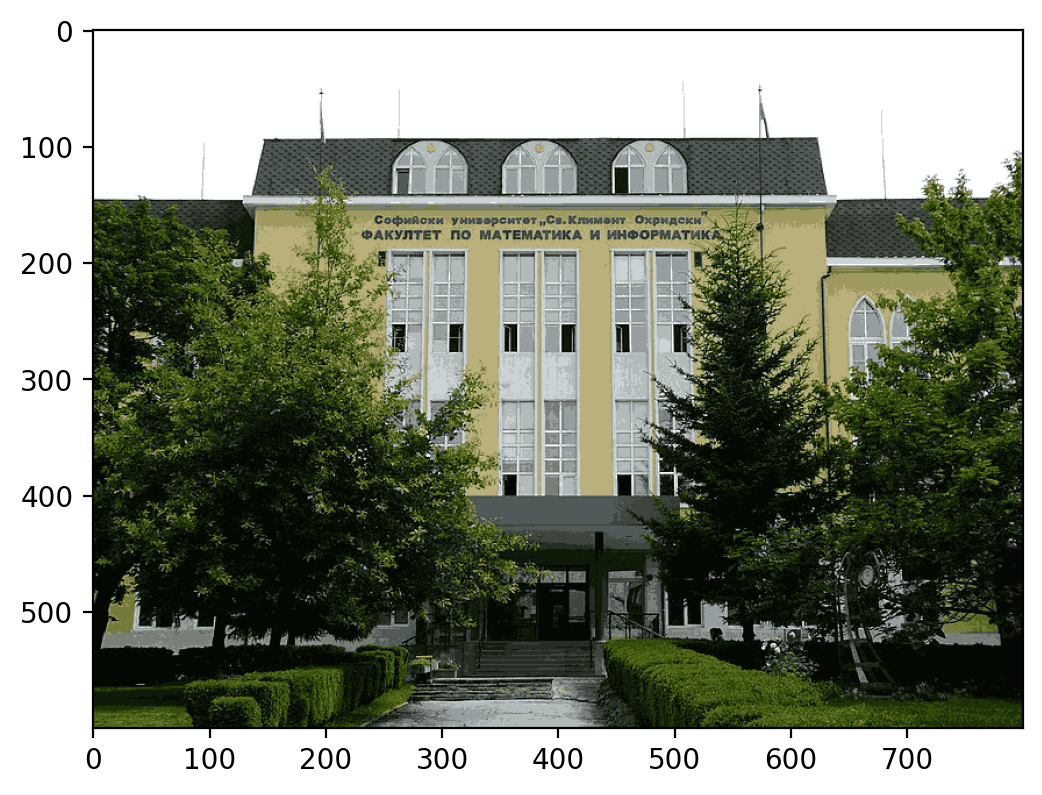

In [39]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

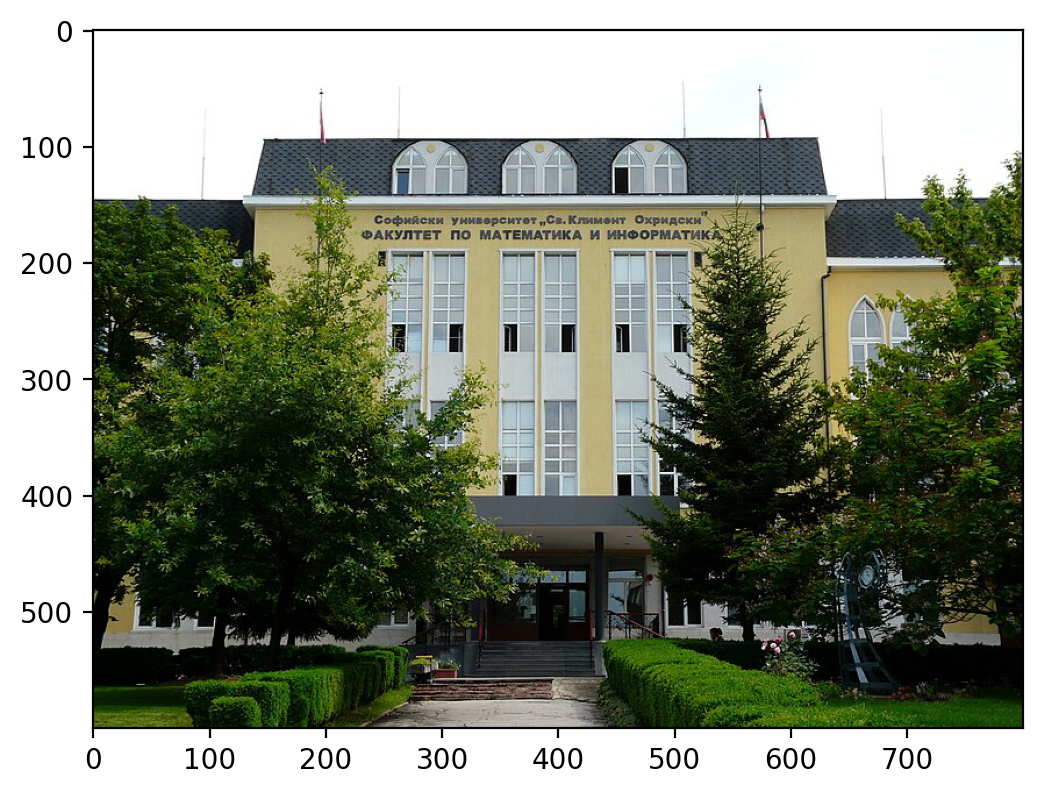

In [40]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Hierarchical Clustering

Two types of hierarchical clustering:

- Divisive (top down), and agglomerative (bottom up)

Hierarchical K-means is a divisive method

- Start with all the data in 1 cluster
- Split using “flat” K-means
- For each cluster, recursively split each cluster

K is usually small

Need to decide when to stop


## Divisive Methods 
## Hierarchical K-Means

| Training  | Final centroids |
| ------------- | ------------- |
| 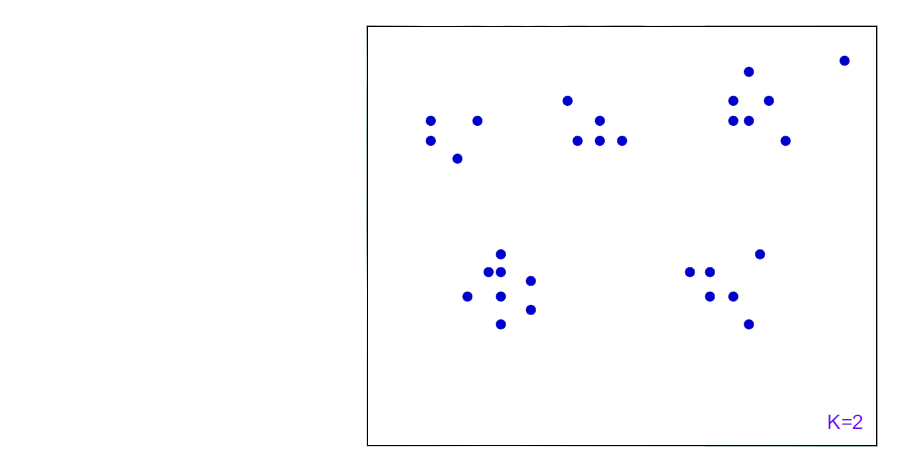   | 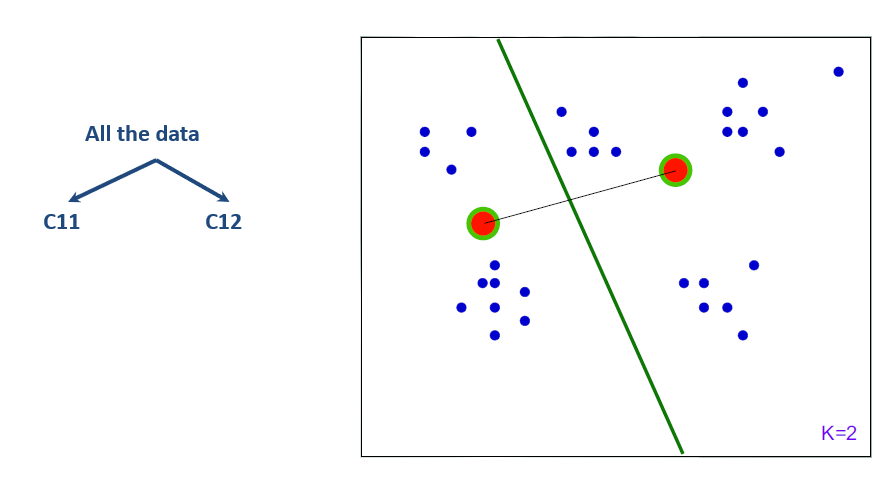  |
| 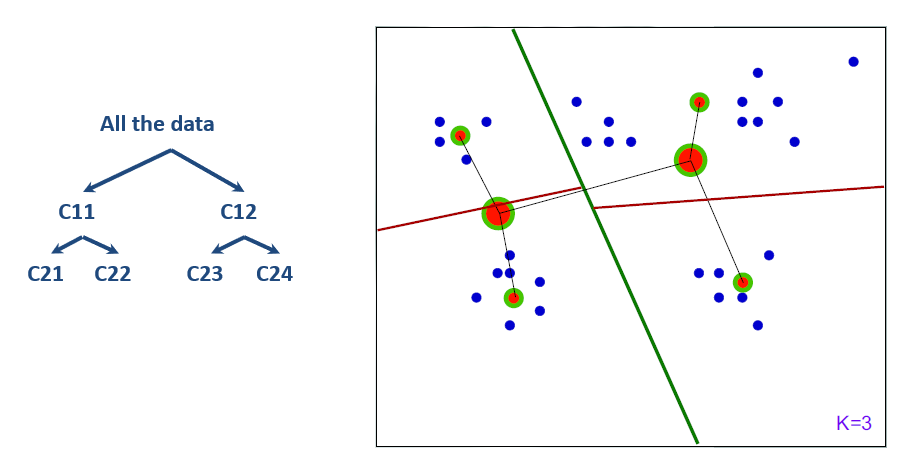   | 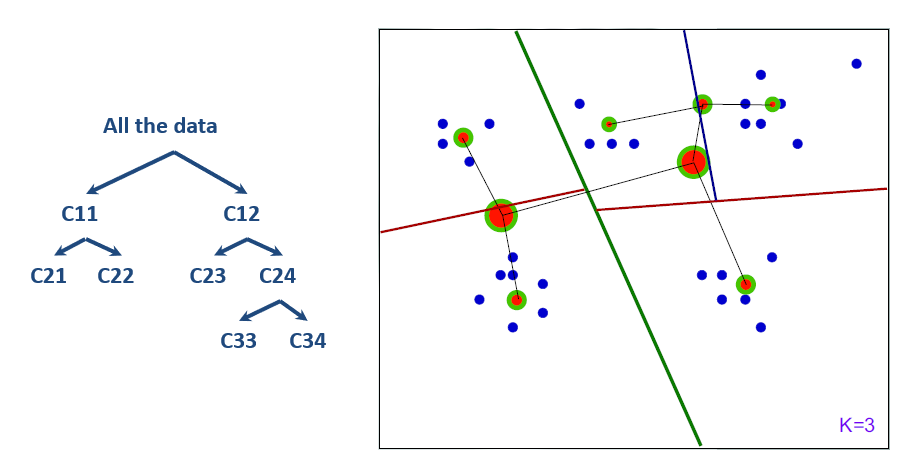  |


## Agglomerative Techniques
## Agglomerative Clustering

- Work in reverse direction (bottom up)

```psuedocode
Given N data points and dissimilarity measure:
    Start with all the data in separate classes
    Repeat N-1 times:
        Find closest two groups and merge them

```


| A dendrogram is a diagram that shows the hierarchical relationship between objects  | We can use it to decide how many clusters we need |
| ------------- | ------------- |
|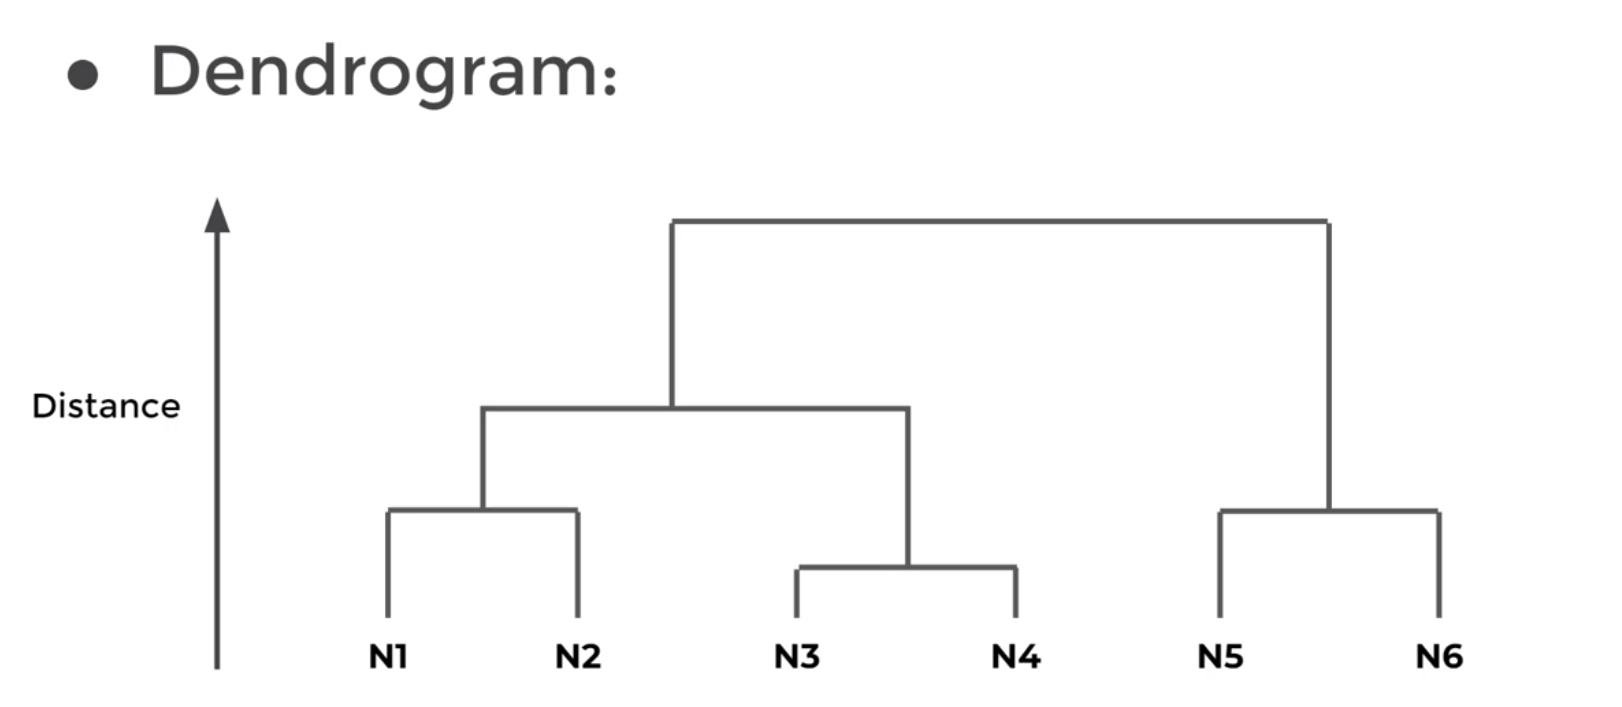  | 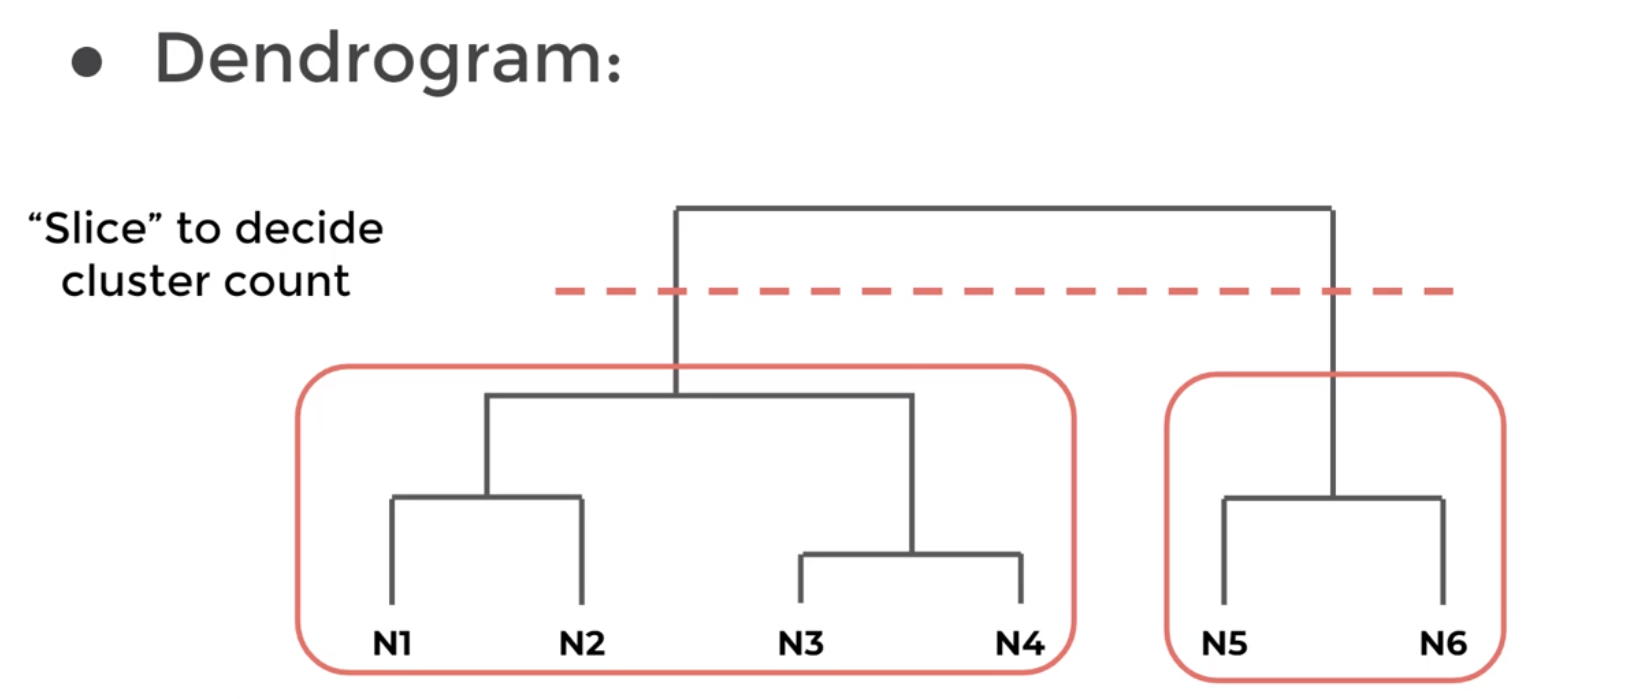  |

| How do we measure dissimilarity between groups?  | Final centroids |
| ------------- | ------------- |
| 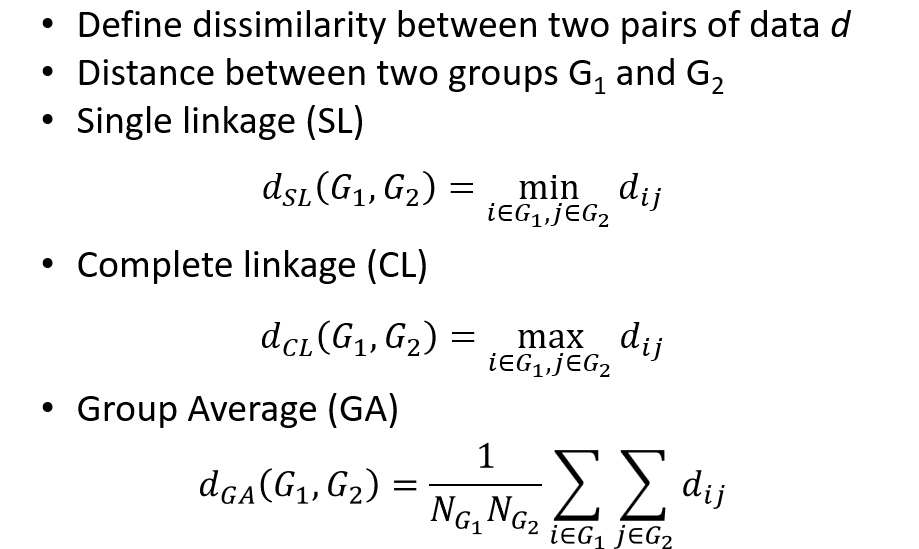   | 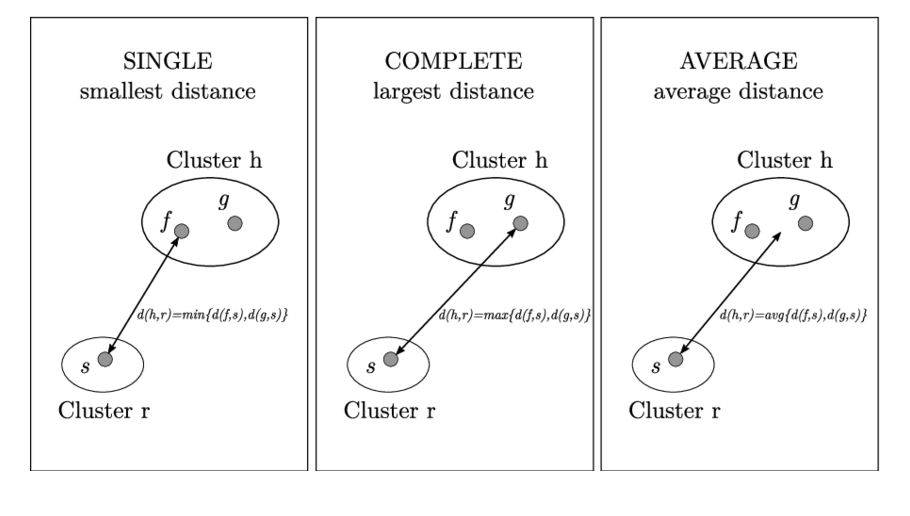  |

- If data is not nicely clustered, you will get different clusters
- If data is nicely clustered, particular choice doesn’t matter
- Single Link -> Less compact clusters
- Group Average -> Medium compact clusters 
- Complete Link -> More compact clusters


In [41]:
from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

In [42]:
def plot_clusters(data, cluster_ids):
    plt.scatter(data[:,0], data[:,1], c = cluster_ids)
    plt.show()

In [52]:
hierarchical_blobs, hierarchical_clusters = make_blobs()

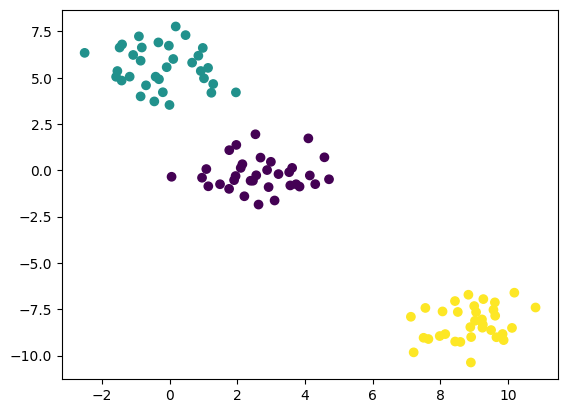

In [53]:
plot_clusters(hierarchical_blobs, hierarchical_clusters)

In [54]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [55]:
aggl.fit(hierarchical_blobs)

AgglomerativeClustering(n_clusters=3)

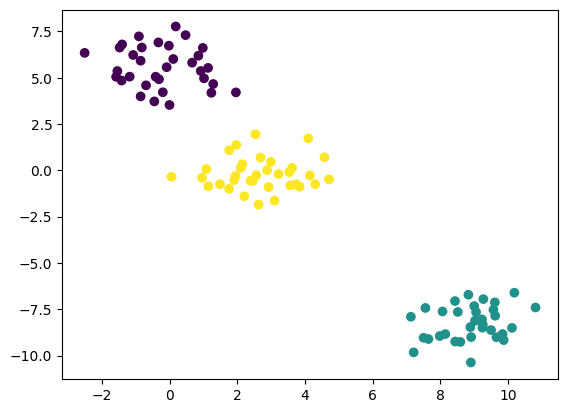

In [56]:
plot_clusters(hierarchical_blobs, aggl.labels_)

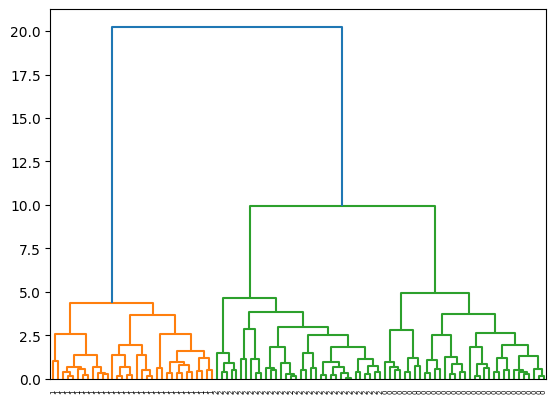

In [57]:
row_clusters = linkage(hierarchical_blobs, method = "complete", metric = "euclidean")

dendrogram(row_clusters, labels = aggl.labels_)

plt.show()